# **2nd Answer**

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [138]:
#setting the hyperparameters
momentum=0.9
gamma=0.9
epsilon=1e-9

start = np.array([20.0, 20.0])

In [139]:
def function(x,y):
  return 10 * x**2 + y**2

def gradient_f(x,y):
  x_grad=20*x
  y_grad=2*y
  return np.array([x_grad,y_grad])

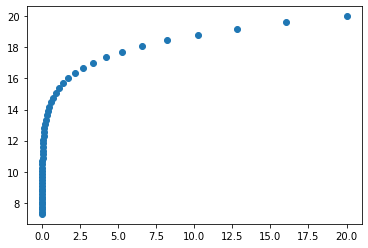

In [140]:
#Vannila SGD
learning_rate=0.01
%matplotlib inline
num_iterations = 50
path = [start]

def vanilla_sgd(x,y,x_grad,y_grad):
  x=x-learning_rate*x_grad
  y=y-learning_rate*y_grad
  return x,y

x_updated1=[]
y_updated1=[]

for i in range(num_iterations):
    x, y = path[-1]
    grad_x, grad_y = gradient_f(x, y)
    path.append(vanilla_sgd(x, y, grad_x, grad_y))

for i in range(len(path)):
  x_updated1.append(path[i][0])
  y_updated1.append(path[i][1])

plt.scatter(x_updated1,y_updated1)

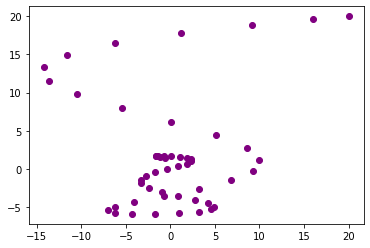

In [141]:
#SGD_with_momentum
learning_rate=0.01
%matplotlib inline
velocity = np.zeros_like(start)
num_iterations = 50
path = [start]
def sgd_with_momentum(x, y, x_grad, y_grad):
    global velocity
    velocity = momentum * velocity - learning_rate * np.array([x_grad, y_grad])
    x += velocity[0]
    y += velocity[1]
    return x, y

x_updated2=[]
y_updated2=[]

for i in range(num_iterations):
    x, y = path[-1]
    grad_x, grad_y = gradient_f(x, y)
    path.append(sgd_with_momentum(x, y, grad_x, grad_y))

for i in range(len(path)):
  x_updated2.append(path[i][0])
  y_updated2.append(path[i][1])

plt.scatter(x_updated2,y_updated2,color='purple')


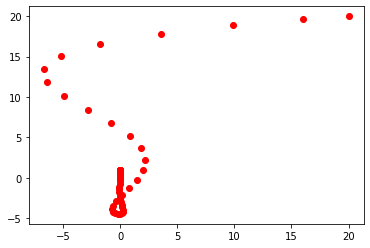

In [142]:
#nesterov_momentum
learning_rate=0.01
%matplotlib inline
velocity = np.zeros_like(start)
num_iterations = 50
path = [start]
def nesterov_momentum(x, y, x_grad, y_grad):
    global velocity
    lookahead_x = x + momentum * velocity[0]
    lookahead_y = y + momentum * velocity[1]
    lookahead_grad_x, lookahead_grad_y = gradient_f(lookahead_x, lookahead_y)
    velocity = momentum * velocity - learning_rate * np.array([lookahead_grad_x, lookahead_grad_y])
    x += velocity[0]
    y += velocity[1]
    return x, y

x_updated3=[]
y_updated3=[]

for i in range(num_iterations):
    x, y = path[-1]
    grad_x, grad_y = gradient_f(x, y)
    path.append(nesterov_momentum(x, y, grad_x, grad_y))

for i in range(len(path)):
  x_updated3.append(path[i][0])
  y_updated3.append(path[i][1])

plt.scatter(x_updated3,y_updated3,color='red')

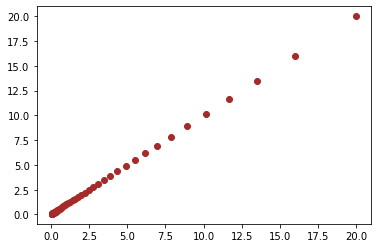

In [143]:
#adagrad
%matplotlib inline
G = np.zeros_like(start)
num_iterations = 50
learning_rate=4
path = [start]
def adagrad(x, y, x_grad, y_grad):
    global G
    G += gradient_f(x, y)**2
    x -= learning_rate * x_grad / (np.sqrt(G[0]) + epsilon)
    y -= learning_rate * y_grad / (np.sqrt(G[1]) + epsilon)
    return x, y

x_updated4=[]
y_updated4=[]
for i in range(num_iterations):
    x, y = path[-1]
    grad_x, grad_y = gradient_f(x, y)
    path.append(adagrad(x, y, grad_x, grad_y))

for i in range(len(path)):
  x_updated4.append(path[i][0])
  y_updated4.append(path[i][1])

plt.scatter(x_updated4,y_updated4,color='brown')

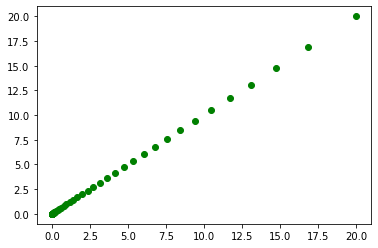

In [144]:
#rmsprop
%matplotlib inline
R = np.zeros_like(start)
num_iterations = 50
learning_rate = 1
path = [start]
def rmsprop(x, y, x_grad, y_grad):
    global R
    R = gamma * R + (1 - gamma) * gradient_f(x, y)**2
    x -= learning_rate * x_grad / (np.sqrt(R[0]) + epsilon)
    y -= learning_rate * y_grad / (np.sqrt(R[1]) + epsilon)
    return x, y

x_updated5=[]
y_updated5=[]

for i in range(num_iterations):
    x, y = path[-1]
    grad_x, grad_y = gradient_f(x, y)
    path.append(rmsprop(x, y, grad_x, grad_y))

for i in range(len(path)):
  x_updated5.append(path[i][0])
  y_updated5.append(path[i][1])

plt.scatter(x_updated5,y_updated5,color='green')

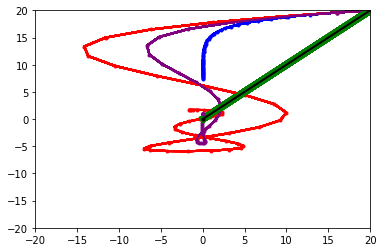

In [145]:
#%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter


fig,ax = plt.subplots()
def init():  
    ax.set_xlim(-20, 20)  
    ax.set_ylim(-20, 20)  
def animate(i):
    line, = ax.plot(x_updated1[0:i], y_updated1[0:i], color = 'blue',lw=2)
    line2, = ax.plot(x_updated2[0:i], y_updated2[0:i], color = 'red',lw=2)
    line3, = ax.plot(x_updated3[0:i], y_updated3[0:i], color = 'purple',lw=2)
    line4, = ax.plot(x_updated4[0:i], y_updated4[0:i], color = 'green',lw = 7)
    line5, = ax.plot(x_updated5[0:i], y_updated5[0:i], color = 'black',lw = 2)
    point1, = ax.plot(x_updated1[i], y_updated1[i], marker='.', color='blue')
    point2, = ax.plot(x_updated2[i], y_updated2[i], marker='.', color='red')
    point3, = ax.plot(x_updated3[i], y_updated3[i], marker='.', color='purple')
    point4, = ax.plot(x_updated4[i], y_updated4[i], marker='.', color='green')
    point5, = ax.plot(x_updated5[i], y_updated5[i], marker='.', color='black')
    return line, line2, line3,line4,line5, point1, point2, point3,point4,point5

ani = FuncAnimation(fig, animate, init_func=init,frames = 50)
writer = PillowWriter(fps=5)  
ani.save("demo_sine.gif", writer=writer)  

# **1st Answer**

In [146]:
# Import necessary libraries
import torch
import torchvision.models as models
import torch.nn.functional as F
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


plot for image:1 after vannila backpropagation


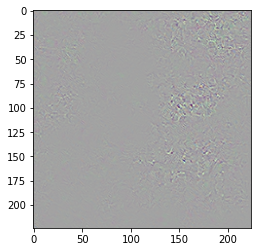

plot for image:2 after vannila backpropagation


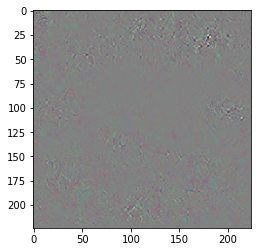

plot for image:3 after vannila backpropagation


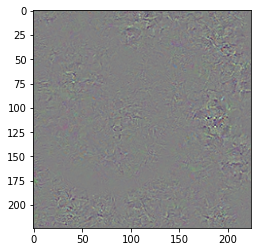

plot for image:4 after vannila backpropagation


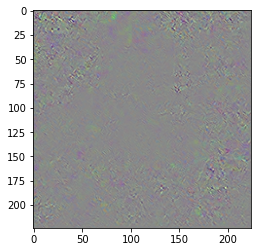

plot for image:5 after vannila backpropagation


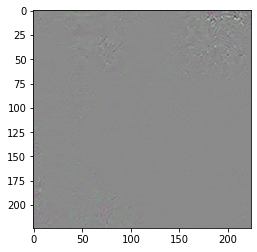

In [147]:

# Load ResNet-50 model
model = models.resnet50(pretrained=True)


for j in range(0,5):
    # Load image
    if(j==0):
      img_path='i1.jpg'
    elif(j==1):
      img_path='i2.jpg'
    elif(j==2):
      img_path='i3.jpg'
    elif(j==3):
      img_path='i4.jpg'
    elif(j==4):
      img_path='i5.jpg'
    
    # img_path = 'i1.jpg'
    img = Image.open(img_path).resize((224, 224))
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = torch.from_numpy(x).permute(0, 3, 1, 2)
    x=x.float()
    x.requires_grad_(True)

    # Compute gradients using built-in implementation
    outputs = model(x)
    top_output = torch.argmax(outputs)
    top_output_tensor = outputs[0, top_output]
    grads = torch.autograd.grad(top_output_tensor, x)[0]

    # Normalize gradients
    grads = (grads - torch.min(grads)) / (torch.max(grads) - torch.min(grads))
 
    print("plot for image:{} after vannila backpropagation".format(j+1))
    # Visualize gradients
    plt.imshow(grads[0].permute(1, 2, 0))
    plt.show()


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


plot for image:1 after Guided-back-propagation


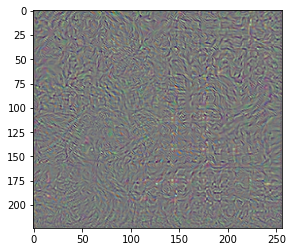

plot for image:2 after Guided-back-propagation


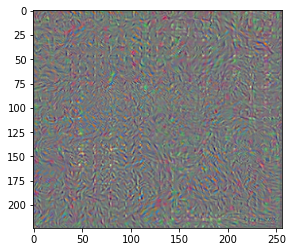

plot for image:3 after Guided-back-propagation


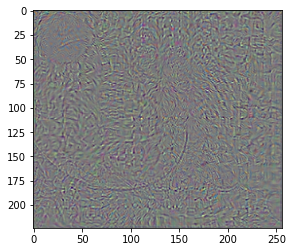

plot for image:4 after Guided-back-propagation


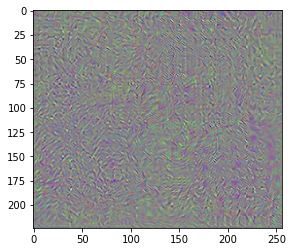

plot for image:5 after Guided-back-propagation


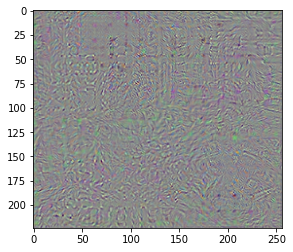

In [148]:

for j in range(0,5):
    # Load image
    if(j==0):
      img_path='i1.jpg'
    elif(j==1):
      img_path='i2.jpg'
    elif(j==2):
      img_path='i3.jpg'
    elif(j==3):
      img_path='i4.jpg'
    elif(j==4):
      img_path='i5.jpg'

    img = Image.open(img_path).resize((256, 224))
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = torch.from_numpy(x).permute(0, 3, 1, 2)
    x=x.float()
    x.requires_grad_(True)

    # Define guided backpropagation function
    class GuidedReLU(torch.autograd.Function):
        @staticmethod
        def forward(ctx, input):
            ctx.save_for_backward(input)
            return F.relu(input)

        @staticmethod
        def backward(ctx, grad_output):
            input, = ctx.saved_tensors
            grad_input = grad_output.clone()
            grad_input[input < 0] = 0
            grad_input[grad_output < 0] = 0
            return grad_input

    # Replace ReLU with guided ReLU in the ResNet-50 model
    for module in model.modules():
        if isinstance(module, torch.nn.ReLU):
            module.register_backward_hook(lambda module, grad_input, grad_output: (GuidedReLU.apply(grad_output[0]),))

    # Compute gradients using built-in implementation
    outputs = model(x)
    top_output = torch.argmax(outputs)
    top_output_tensor = outputs[0, top_output]
    grads = torch.autograd.grad(top_output_tensor, x)[0]

    # Normalize gradients
    grads = (grads - torch.min(grads)) / (torch.max(grads) - torch.min(grads))

    print("plot for image:{} after Guided-back-propagation".format(j+1))

    # Visualize gradients
    plt.imshow(grads[0].permute(1, 2, 0))
    plt.show()
    


In [ ]:

# Load image
img_path = 'i1.jpg'
img = Image.open(img_path)

# Apply image transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(), # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize
])
x = transform(img)
# Add batch dimension
x = x.unsqueeze(0)

# Compute CAM
# outputs = model(x)
# print(outputs.shape)

# Rest of the code to compute CAM goes here
last_conv_layer = model.layer4[-1].conv3
final_dense_layer = model.fc

# Compute CAM
outputs = model(x)
top_output = torch.argmax(outputs)
last_conv_output = last_conv_layer(outputs)
pooled_grads = torch.mean(torch.autograd.grad(outputs[:, top_output], last_conv_output, retain_graph=True)[0], dim=[0, 2, 3])
cam = torch.sum(pooled_grads[:, None, None] * last_conv_output, dim=1).squeeze().detach().cpu().numpy()
cam = np.maximum(cam, 0)
cam = cam / np.max(cam)

# Visualize CAM
plt.imshow(cam)
plt.show()